# Applied Data Science: UsedCar-Datensatz Analyse



Autoren: Marco Matter, Sascha Walder, Dario Hächler

Klasse: WIN-18HS-VZa  
Datum: 12.06.2022


Group Project über amerkianische Gebraucht-Fahrzeuge

Datensatz mittels WebScrapping & API zusammengesetzt aus sfbay.craigslist.org. Die untersuchten Daten beziehen sich  ausschliesslich auf bereits gebrauchte Fahrzeuge aus dem Jahre 2021.



### Projektanforderungen (max. 4 Punkte):

* Datenerhebung mittels Web Scraping oder API
* Datenaufbereitung (dazu können Methoden aus Data Science Fundamantals verwendet werden)
* Verwendung eines ML Frameworks/Library (tensorflow/keras, sklearn oder im Kurs nicht betrachtete wie pytorch) 
* Versionierung und Verfügbarmachen der Daten und des Modells über GitHub


### Zusatzpunkte (max. 5 Punkte):

* Kreativität der Umsetzung (kreativ ist alles, was in den Lektionen und Übungen nicht vorgegeben wurde)
* Verwendung von sowohl Web Scraping als auch API's für den Datenbezug
* Verwendung von Docker oder eines Cloud-Services (z.B. EC2-Instance, Jupyter-Notebook via Sagemaker)
* Verwendung einer fortgeschrittenen Deep Learning Struktur/Technik (z.B.CNN, RNN, Transfer Learning, Transformers…)
* Forschungsbasierte Analyse der ethischen Fragestellung und potenzielle Risiken/Bias des entwickelten Produkts


### Videoaufzeichnung (max. 3 Punkte):
Bewertet werden:

- Qualität der Präsentation
- Struktur der Präsentation
- Zeiteinhaltung (Länge der Präsentation (min.) = Anzahl Studierende pro Gruppe x 5 Min.) => 15 Min.




### Checkliste (max. 12 Punkte):
-  [BOTH DONE] Datenerhebung mittels Web Scraping oder API 
-  [DONE] Datenaufbereitung (dazu können Methoden aus Data Science Fundamantals verwendet werden)
-  [DONE] Verwendung eines ML Frameworks/Library (tensorflow/keras, sklearn oder im Kurs nicht betrachtete wie pytorch)
-  [DONE] Versionierung und Verfügbarmachen der Daten und des Modells über GitHub
-  [DONE] Kreativität der Umsetzung (kreativ ist alles, was in den Lektionen und Übungen nicht vorgegeben wurde)
-  [DONE] Verwendung von sowohl Web Scraping als auch API's für den Datenbezug
-  [DONE] Verwendung von Docker oder eines Cloud-Services (z.B. EC2-Instance, Jupyter-Notebook via Sagemaker)
-  [DONE] Verwendung einer fortgeschrittenen Deep Learning Struktur/Technik (z.B.CNN, RNN, Transfer Learning, Transformers…)
-  [DONE] Forschungsbasierte Analyse der ethischen Fragestellung und potenzielle Risiken/Bias des entwickelten Produkts  
-  [DONE] Zeiteinhaltung (Länge der Präsentation (min.) = Anzahl Studierende pro Gruppe x 5 Min.) => 15 Min.

In [1]:
#Bibliotheken importieren
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.image as mpimg
import seaborn as sns

In [2]:
#Schritt 1: CSV-File wird eingelesen
data = pd.read_excel (r'C:\Users\alexw\Desktop\cars.xlsx')
#Blendet alle Spalten ein
pd.options.display.max_columns = None
#Zeigt data an
display(data)

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,17908,Ford,Puma,Gasoline,Manual,Employee's car,20750,125,2020
1,3437,Ford,EcoSport,Diesel,Manual,Used,20750,125,2020
2,4600,Renault,Megane,Gasoline,Manual,Demonstration,20780,140,2020
3,10,Mazda,CX-30,Gasoline,Manual,Pre-registered,20790,122,2020
4,14700,SEAT,Leon,Gasoline,Automatic,Employee's car,20830,150,2020
5,9466,Volkswagen,Golf,Gasoline,Manual,Demonstration,20900,131,2020
6,5962,Opel,Crossland X,Gasoline,Automatic,Used,20950,131,2020
7,7300,Ford,Puma,Gasoline,Manual,Employee's car,20950,125,2020
8,10,Ford,Fiesta,Electric/Gasoline,Manual,Demonstration,20950,125,2020
9,3800,Renault,Megane,Gasoline,Manual,Demonstration,20980,140,2020


In [3]:
#Gibt die Form des Datensatzs an (Anzahl Zeilen, Anzahl Spalten)
data.shape

(931, 9)

In [4]:
#Gibt die Datentypen der Spalten an
data.dtypes

mileage       int64
make         object
model        object
fuel         object
gear         object
offerType    object
price         int64
hp            int64
year          int64
dtype: object

In [5]:
data.isna()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [6]:
#Anzahl der leeren bzw. "True"-Datenfelder anzeigen lassen
data.isnull().sum(axis = 0)

mileage      0
make         0
model        0
fuel         0
gear         0
offerType    3
price        0
hp           0
year         0
dtype: int64

In [7]:
#Drop Rows with NaN Values inplace & in cleandata speichern
data.dropna(inplace=True)

cleandata = data

In [8]:
#Als Kontrolle Daten nochmals anzeigen
display(cleandata)

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,17908,Ford,Puma,Gasoline,Manual,Employee's car,20750,125,2020
1,3437,Ford,EcoSport,Diesel,Manual,Used,20750,125,2020
2,4600,Renault,Megane,Gasoline,Manual,Demonstration,20780,140,2020
3,10,Mazda,CX-30,Gasoline,Manual,Pre-registered,20790,122,2020
4,14700,SEAT,Leon,Gasoline,Automatic,Employee's car,20830,150,2020
5,9466,Volkswagen,Golf,Gasoline,Manual,Demonstration,20900,131,2020
6,5962,Opel,Crossland X,Gasoline,Automatic,Used,20950,131,2020
7,7300,Ford,Puma,Gasoline,Manual,Employee's car,20950,125,2020
8,10,Ford,Fiesta,Electric/Gasoline,Manual,Demonstration,20950,125,2020
9,3800,Renault,Megane,Gasoline,Manual,Demonstration,20980,140,2020


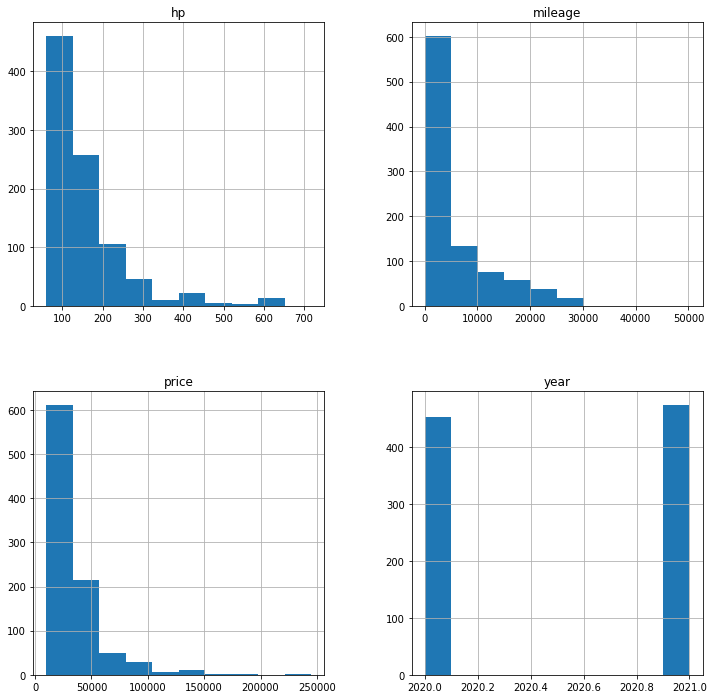

In [9]:
cleandata.hist(figsize=(12,12));

In [10]:
#Welche Arten von Fahrzeugen wurden über die Webseite gekauft und in welcher Anzahl?
#Spalte "make" wird in eigene Variable geschrieben
numberofmanufacturer = cleandata['make']
#Gibt die aggregierten Anzahl der eizelnen Werte aus
numberofmanufacturer.value_counts()

Ford             117
Volkswagen        94
Hyundai           79
Skoda             65
Audi              65
Renault           54
Kia               50
Fiat              50
SEAT              48
Mercedes-Benz     47
Toyota            33
Opel              31
Citroen           22
BMW               20
Jeep              18
Volvo             18
Land              16
Dacia             16
Peugeot           15
Mazda             12
Mitsubishi        10
Nissan             8
Porsche            7
Jaguar             7
Suzuki             6
Cupra              6
Alfa               4
SsangYong          3
Subaru             2
Lexus              1
Aston              1
Bentley            1
MINI               1
Dodge              1
Name: make, dtype: int64

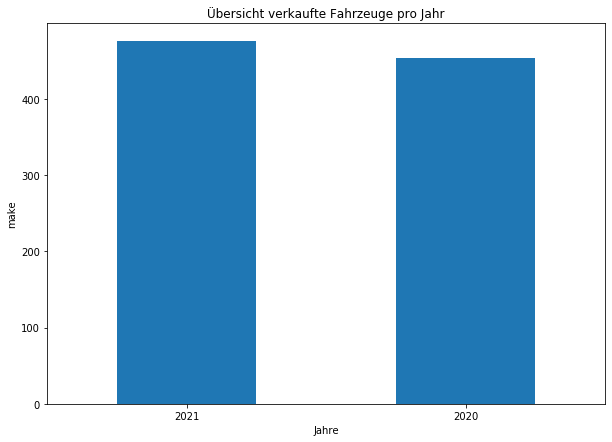

In [11]:
#Nun kann der Verkauf der Fahrzeuge über die beiden Jahre verglichen werden
cleandata["year"].value_counts().plot.bar(title='Übersicht verkaufte Fahrzeuge pro Jahr', rot=0, figsize=(10,7))
plt.xlabel('Jahre')
plt.ylabel('make');

## Pferdestärke (PS) / Horsepower (HP):

#### Die Anzahl hp (Horsepower) oder auch in Deutsch Pferdestärke (PS) genannt, ist die Maßeinheit für die vom Motor eines Fahrzeugs erzeugte Leistung - je höher die Zahl, desto mehr Kraft wird auf die Räder übertragen.

##### In einem weiteren Schritt untersuchen wir die die Verteilung der Fahrzeuge nach deren Pferdestärke:

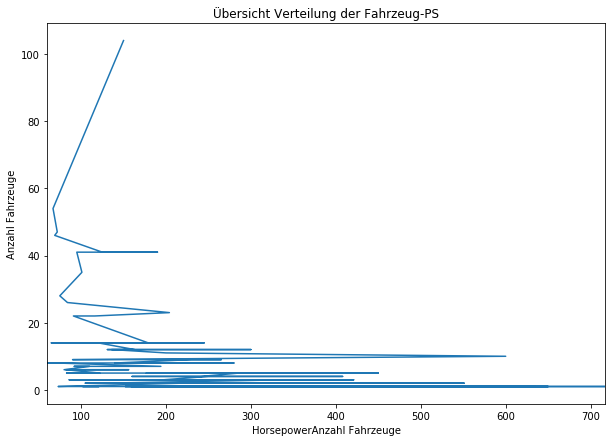

In [12]:
cleandata["hp"].value_counts().plot.line(title='Übersicht Verteilung der Fahrzeug-PS', rot=0, figsize=(10,7))
plt.xlabel('HorsepowerAnzahl Fahrzeuge')
plt.ylabel('Anzahl Fahrzeuge');

In [13]:
#Die Fahrzeuge mit höchster bis niedrigster PS-Anzahl anzeigen lassen. 
display(cleandata.sort_values(by=['hp'], ascending=False))


,mileage,make,model,fuel,gear,offerType,price,hp,year
222,1,Dodge,Challenger,Gasoline,Automatic,Used,88990,717,2020
447,1001,Porsche,911,Gasoline,Automatic,Used,237880,650,2021
537,2555,Bentley,Continental,Gasoline,Automatic,Employee's car,244777,635,2020
446,4909,BMW,M8,Gasoline,Automatic,Demonstration,142220,625,2021
366,3000,Audi,R8,Gasoline,Automatic,Demonstration,189950,620,2021
535,30900,Audi,RS Q8,Gasoline,Automatic,Used,144900,600,2020
233,30000,Audi,RS6,Gasoline,Automatic,Used,112440,600,2020
234,14000,Audi,RS7,Gasoline,Automatic,Used,126980,600,2020
363,3000,Audi,RS6,Gasoline,Automatic,Demonstration,140950,600,2021
359,6999,Audi,RS6,Gasoline,Automatic,Demonstration,118880,600,2021


In [14]:
#Eine Übersicht aller gekauften Porsches
cleandata.loc[data['make'] == 'Porsche',:]

,mileage,make,model,fuel,gear,offerType,price,hp,year
79,6500,Porsche,Macan,Gasoline,Automatic,Demonstration,83490,354,2021
355,6500,Porsche,Cayman,Gasoline,Manual,Demonstration,96900,400,2021
357,6500,Porsche,Macan,Gasoline,Automatic,Demonstration,102911,441,2021
360,6500,Porsche,Panamera,Electric/Gasoline,Automatic,Demonstration,135900,462,2021
361,9000,Porsche,Panamera,Gasoline,Automatic,Demonstration,138500,480,2021
364,9000,Porsche,Panamera,Electric/Gasoline,Automatic,Demonstration,155500,560,2021
447,1001,Porsche,911,Gasoline,Automatic,Used,237880,650,2021


In [15]:
#Machine Learning-Anwendung
fahrzeugart = cleandata.loc[ (data['model'] == "Puma") | (cleandata['model'] == 'Megane') | (cleandata['model'] == "Leon") ]
fahrzeugart.shape

(66, 9)

In [16]:
#x = Abhängige-Variable
x = fahrzeugart[['mileage', 'hp']]
x

,mileage,hp
0,17908,125
2,4600,140
4,14700,150
7,7300,125
9,3800,140
10,3078,125
13,2585,125
15,29,125
17,9306,125
33,2900,245


In [17]:
#y = Ziel-Variable
y = fahrzeugart['price'].values
y

array([20750, 20780, 20830, 20950, 20980, 20999, 21298, 21490, 21498,
       39990, 34950, 45990, 21650, 22450, 22960, 22960, 22960, 23960,
       24250, 24450, 24450, 24650, 20470, 22750, 23950, 21589, 21680,
       21781, 21890, 21950, 22107, 22280, 22290, 22550, 43280, 34970,
       24960, 24993, 25450, 25790, 26960, 27450, 23950, 24950, 25950,
       22550, 22650, 22650, 22750, 22770, 22950, 22990, 22990, 22990,
       21990, 29650, 29960, 30450, 30650, 30650, 30650, 17990, 26350,
       26950, 27650, 24190], dtype=int64)

In [18]:
#KNN KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [19]:
#x = Abhängige-Variable und y = Ziel-Variable
knn_model = KNeighborsClassifier()
knn_model.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
#Berechnung des Scores des Models
knn_model.score(x,y)

0.24242424242424243

Fazit:

Der Score liegt mit 24% sehr tief -> anhand der nächsten Nachbarn werden 24% der Fälle richtig zugeordnet. Dies ist unter anderem darauf zurück zu führen, dass der untersuchte Datensatz verhältnissmässig sehr klein ist.


In [21]:
#Liste für die In-Sample Genauigkeit
klist = [1,2,3,5,7,9,11]
insamp = []         

In [22]:
#Modell definiern
#Modell auf dem Trainingsset trainieren
#resultierende In-Sample Performance an die Liste insamp anhängen
for k in klist:
    model = KNeighborsClassifier(n_neighbors = k)  
    model.fit(x,y)                                 
    insamp.append(model.score(x,y))       

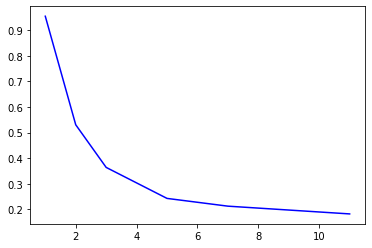

In [23]:
sns.lineplot(klist, insamp, color ='blue');   

In [24]:
#Decision-Tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# Wir benutzen 20% unserer Daten zum Testen und tranieren damit die restlichen 80% unserer Daten. 
# x_train, x_test Inputset
# y_train, y_test Outputset
# Mit dem Random_state stellen wir sicher, dass Zufallszahlen in gleicher Reihenfolge generiert werden. 
# Würde keinen random_state gesetzt werden, so würde sich unser Ergebnis immer wieder verändern.
# Wir verwenden den random_state=42 um zu gewährleisten, dass wir immer die gleiche Ausgabe beim testen erhalten (reproduzierbar).

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 30)


model = DecisionTreeClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
predictions2 = model.predict(x_train)


score = accuracy_score(y_test, predictions)

print('Accuracy of testing data:', round(score*100, 2), '%.')
print('Conusion matrix for testing data: \n',confusion_matrix(y_test, predictions))

score = accuracy_score(y_train, predictions2)

print('Accuracy of training data:', round(score*100, 2), '%.')
print('Conusion matrix for training data: \n',confusion_matrix(y_train, predictions2))

#In Anlehnung an: https://www.datacamp.com/tutorial/decision-tree-classification-python

Accuracy of testing data: 7.14 %.
Conusion matrix for testing data: 
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 

Fazit:

Die Genauigkeit liegt bei den Testdaten bei 7.14% (viel zu tief) -> Dies ist einerseits darauf zurück zu führen, dass der untersuchte Datensatz verhältnissmässig sehr klein ist. Andererseits ist das angewandte Model sehr komplex.
Lösung: Viel grösseren Datensatz scrappen und Modelkomplexität verringern.
    
Die Genauigkeit des Trainingsdaten hingegen ist zu hoch was auf ein Overfitting hindeutet.
Lösung: -Mehr Daten
        -Early Stop